# Introduction to flux

In [ ]:
#Pkg.update("Flux")

In [1]:
using Flux

#### Regression problem

In [64]:
function linear(in, out)
  W = param(randn(out, in))
  b = param(randn(out))
  x -> W * x .+ b
end

# we can access linear1.W etc
linear1 = linear(1, 3) 
linear2 = linear(3, 1)

model(x) = linear2(relu.(linear1(x)))

model (generic function with 1 method)

Get the output for a single input vector

In [65]:
model([1]) 

Tracked 1-element Array{Float64,1}:
 -1.96405

Get the output for a batch of inputs (as columns in a matrix)

In [66]:
model(rand(1,10))

Tracked 1×10 Array{Float64,2}:
 -2.02143  -2.03586  -2.03586  -2.03586  …  -2.03586  -2.01317  -2.03586

In [67]:
loss(x, y) = sum((model(x) .- y).^2)

loss (generic function with 1 method)

In [68]:
l = loss(5, 1)

Tracked 0-dimensional Array{Float64,0}:
17.0259

### Inside a tracked array

In [69]:
fieldnames(l)

4-element Array{Symbol,1}:
 :ref 
 :f   
 :data
 :grad

In [70]:
l.f.args

(param([17.0259]),)

In [71]:
# This contains
l.f.args[1]

Tracked 1×1 Array{Float64,2}:
 17.0259

In [106]:
fieldnames(l.f)

2-element Array{Symbol,1}:
 :func
 :args

In [108]:
l.f.func

sum (generic function with 23 methods)

#### Get data

In [89]:
X = Array(1:50)';
y = [(x + 2*sin(x[1] + rand(1)[1]/100))/2 for x in X];

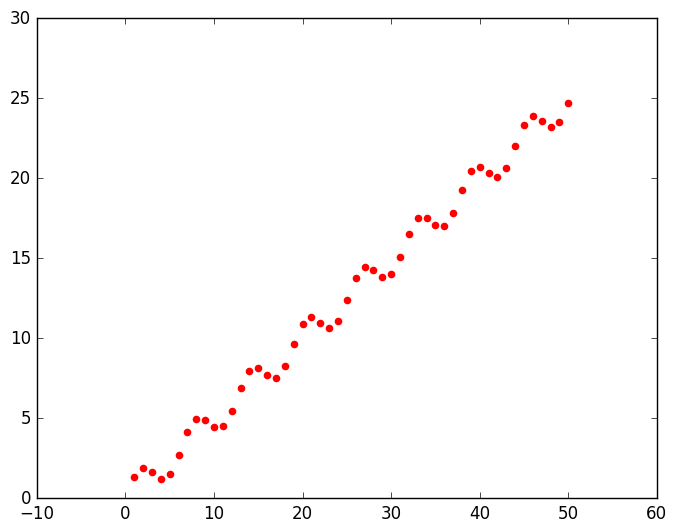

PyObject <matplotlib.collections.PathCollection object at 0x12c2195f8>

In [93]:
using PyPlot
scatter(X, y, color="red", linewidth=1.0)

In [95]:
scatter(X, model(X), color="blue", linewidth=0.3)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


####  train

In [109]:
x_ = X[1]
y_ = y[1]

1.3439555722873915

In [110]:
l = loss(x_, y_) # ~ 3

Tracked 0-dimensional Array{Float64,0}:
10.9429

In [111]:
g = Flux.back!(l)

In [142]:
layer1 = Dense(5,10)
fieldnames(layer1)

3-element Array{Symbol,1}:
 :σ
 :W
 :b

In [146]:
?Flux.Dense

```
Dense(in::Integer, out::Integer, σ = identity)
```

Creates a traditional `Dense` layer with parameters `W` and `b`.

```
y = σ.(W * x .+ b)
```

The input `x` must be a vector of length `in`, or a batch of vectors represented as an `in × N` matrix. The out `y` will be a vector or batch of length `out`.

```julia
julia> d = Dense(5, 2)
Dense(5, 2)

julia> d(rand(5))
Tracked 2-element Array{Float64,1}:
  0.00257447
  -0.00449443
```


### Let us try it in a real (easy) dataset

In [ ]:
using MLDatasets
train_x, train_y = MLDatasets.MNIST.traindata()
test_x, test_y = MLDatasets.MNIST.testdata();
train_y = train_y + 1
test_y = test_y + 1
train_x = reshape(train_x,784, 60000);
test_x  = reshape(test_x, 784, 10000);

### Defining a model

In [ ]:
model = Chain(Dense(784, 32, σ),
              Dense(32, 10), 
              softmax)

In [ ]:
typeof(model)

In [ ]:
params(model)

### Make predictions

In [ ]:
# Generate a prediction
model(train_x[:,3])

### Define a loss and optimizer

In [ ]:
loss(x, y) = Flux.crossentropy(model(x), y)

In [ ]:
opt = SGD(params(model), 0.1)

In [ ]:
#l = loss(train_x[1], train_y[1:2])

### Train the model

In [ ]:
train_y[1]

In [ ]:
?Flux.train!

In [ ]:
Flux.train!(loss, (train_x, train_y) , opt,  cb = Flux.throttle(() -> println("training"), 5))